## Time difference of arrival algorithm TDOA

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from scipy.io import wavfile
from scipy import signal

estimation_ = np.array([])

c = 343#m/s
r = 1 #100cm

timestep = 1/44000  #nyquist 2xfrequ_max
frequ = np.fft.fftfreq(160, d=timestep)
#frequ = np.fft.fftshift(frequ)
w = 2*np.pi*frequ

H_right = np.zeros((160,181), dtype=complex)
H_left = np.zeros((160,181), dtype=complex)

# 0 -> 90 
for theta in range(91):
    d = r * np.sin(np.deg2rad(theta))
    tau = d/c
    H_right[:,theta] = np.exp(-1.j*w*0)
    H_left[:,theta] = np.exp(-1.j*w*tau)
    
# 91 -> 180    -1 -> -90 
for theta in range(91,181):  
    d = r * np.sin(np.deg2rad(theta-90)) 
    tau = d/c
    H_right[:,theta] = np.exp(-1.j*w*tau)
    H_left[:,theta] = np.exp(-1.j*w*0)
    
h1 = np.fft.irfft(H_right,axis=0)
h2 = np.fft.irfft(H_left,axis=0)   


#generating white noise and calculating its DFT
fs = 16000 #samples/second
T_ = 0.5 #length of signal in time domain 
N = int(T_*fs) #number of samples of the signal 
mean = 0
std = 1 

white_noise = np.random.normal(mean, std, size=N) #white noise
W = np.fft.rfft(white_noise)



num_samples = int(h1.shape[0])
conv_len = N + num_samples -1
pad1 = np.zeros(conv_len-num_samples+1)
pad2 = np.zeros(conv_len-N+1)
b_ = np.zeros(181)

for theta in range(91) : 
    #theta = 100  #random theta 
    y = np.zeros((conv_len,))
    y2 = np.zeros((conv_len,))

    y = np.convolve(white_noise, h1[:,theta]) 
    y_normalized = (((y-np.min(y))/(np.max(y)-np.min(y)))*2-1)
    y2 = np.convolve(white_noise, h2[:,theta]) 
    y2_normalized = (((y2-np.min(y2))/(np.max(y2)-np.min(y2)))*2-1)

    t = signal.correlate(y_normalized, y2_normalized)

    b = np.argmax(t) - (t.size-1)/2 
    b_[theta] = b
    a = timestep/2 * b * c

    if b > 0 :
        theta_est = -np.rad2deg(np.arcsin(a/r))
    if b < 0 :
        theta_est = -np.rad2deg(np.arcsin(a/r))
        
    theta_est = -np.rad2deg(np.arcsin(a/r))
        
    if theta in range(0,91) :
        print('Ground truth: ' + ''+str(theta) +' ' + ' estimation: ' + str(theta_est))
        estimation_ = np.append(estimation_,theta_est)
    if theta in range(91,181) :
        print(str(theta) + ': ' +'Ground truth: '+str(-(theta-90)) +' : ' + ' estimatiom: ' + str(theta_est)+' /shift= '+ str(b))
        

Ground truth: 0  estimation: -0.0
Ground truth: 1  estimation: 0.8933294834001297
Ground truth: 2  estimation: 1.7868762241886738
Ground truth: 3  estimation: 3.1280802326535007
Ground truth: 4  estimation: 4.023124921616211
Ground truth: 5  estimation: 4.9191541751500125
Ground truth: 6  estimation: 5.816391209659697
Ground truth: 7  estimation: 7.1650064037104055
Ground truth: 8  estimation: 8.066258469811443
Ground truth: 9  estimation: 8.969524340159936
Ground truth: 10  estimation: 9.875043682290848
Ground truth: 11  estimation: 11.23808535059425
Ground truth: 12  estimation: 12.150323103985906
Ground truth: 13  estimation: 13.065699038911466
Ground truth: 14  estimation: 13.98448195638378
Ground truth: 15  estimation: 14.906949226174254
Ground truth: 16  estimation: 15.601389695685775
Ground truth: 17  estimation: 17.23114461094311
Ground truth: 18  estimation: 18.168836781977365
Ground truth: 19  estimation: 19.111593086545984
Ground truth: 20  estimation: 19.822189119082175
Gro

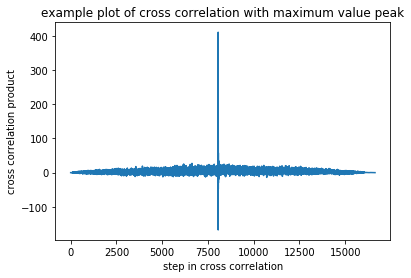

In [3]:
plt.plot(t)
plt.ylabel('cross correlation product')
plt.xlabel('step in cross correlation')
plt.title('example plot of cross correlation with maximum value peak')
plt.show()

In [4]:
ground_truth = np.arange(91)
error0 = np.sum(np.abs(ground_truth[0:16]-estimation_[0:16]))/16
error1 = np.sum(np.abs(ground_truth[16:31]-estimation_[16:31]))/15
error2 = np.sum(np.abs(ground_truth[31:46]-estimation_[31:46]))/15
error3 = np.sum(np.abs(ground_truth[46:61]-estimation_[46:61]))/15
error4 = np.sum(np.abs(ground_truth[61:76]-estimation_[61:76]))/15
error5 = np.sum(np.abs(ground_truth[76:91]-estimation_[76:91]))/15

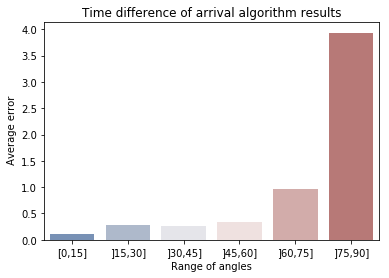

In [5]:
import seaborn as sns
x = np.array(['[0,15]',']15,30]',']30,45]',']45,60]',']60,75]',']75,90]'])
y = np.array([error0,error1,error2,error3,error4,error5])
sns.barplot(x=x, y=y, palette="vlag")
plt.xlabel('Range of angles')
plt.ylabel(' Average error')
plt.title('Time difference of arrival algorithm results')
plt.show()